<a href="https://colab.research.google.com/github/ayyucedemirbas/Medical_Img_Seg/blob/main/TotalSegmentator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install TotalSegmentator

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.0/197.0 kB 8.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.5/347.5 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.4/52.4 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/

In [1]:
!mkdir masks

In [2]:
!TotalSegmentator \
-i /content/Anonymized_20240929.zip \
-o /content/masks \
-ot 'nifti' \
-rs spleen liver \
--nr_thr_saving 1


If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

TotalSegmentator sends anonymous usage statistics. If you want to disable it check the documentation.
Downloading: 100% 234M/234M [00:05<00:00, 39.5MB/s]
Download finished. Extracting...
Downloading: 100% 234M/234M [00:06<00:00, 36.3MB/s]
Download finished. Extracting...
Downloading: 100% 234M/234M [00:06<00:00, 35.6MB/s]
Download finished. Extracting...
Downloading: 100% 234M/234M [00:06<00:00, 35.3MB/s]
Download finished. Extracting...
Downloading: 100% 234M/234M [00:07<00:00, 29.6MB/s]
Download finished. Extracting...
Generating rough segmentation for cropping...
Downloading: 100% 135M/135M [00:03<00:00, 39.4MB/s]
Download finished. Extracting...
Converting dicom to nifti...
  found image with shape (512, 512, 361)
Resampling...
  Resampled in 3.58s
Predicting...
/usr/local/lib/python3.10/dist-packages/nnunetv2/inference/predict_from_raw_data.py:84: FutureWarning: You are using `torch.load` with `weigh

In [4]:
import os

In [7]:
!unzip /content/Anonymized_20240929.zip

Archive:  /content/Anonymized_20240929.zip
 extracting: series-00000/image-00216.dcm  
 extracting: series-00000/image-00159.dcm  
 extracting: series-00000/image-00269.dcm  
 extracting: series-00000/image-00357.dcm  
 extracting: series-00000/image-00124.dcm  
 extracting: series-00000/image-00150.dcm  
 extracting: series-00000/image-00187.dcm  
 extracting: series-00000/image-00129.dcm  
 extracting: series-00000/image-00115.dcm  
 extracting: series-00000/image-00223.dcm  
 extracting: series-00000/image-00350.dcm  
 extracting: series-00000/image-00260.dcm  
 extracting: series-00000/image-00209.dcm  
 extracting: series-00000/image-00206.dcm  
 extracting: series-00000/image-00005.dcm  
 extracting: series-00000/image-00121.dcm  
 extracting: series-00000/image-00046.dcm  
 extracting: series-00000/image-00014.dcm  
 extracting: series-00000/image-00175.dcm  
 extracting: series-00000/image-00163.dcm  
 extracting: series-00000/image-00170.dcm  
 extracting: series-00000/image-0

In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
%matplotlib inline

In [20]:
test_load = nib.load('/content/masks/spleen.nii.gz').get_fdata()
test_load.shape

(512, 512, 361)

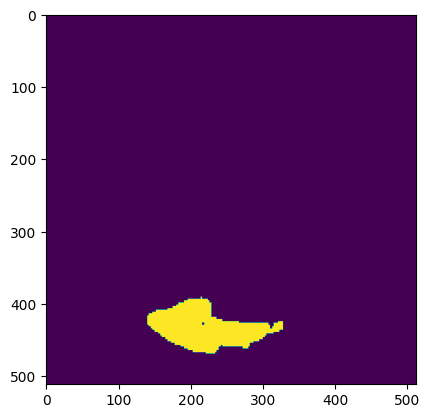

In [32]:
test = test_load[:,:,300]
plt.imshow(test)
plt.show()

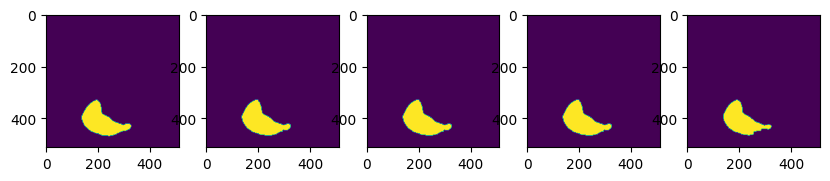

In [27]:
for i in range(5):
    plt.subplot(5, 5,i + 1)
    plt.imshow(test_load[:,:,355 + i])
    plt.gcf().set_size_inches(10, 10)
plt.show()

In [ ]:
!pwd

/content


https://www.dicomlibrary.com/

In [ ]:
totalsegmentator("/content/Anonymized_20240929.zip", ".")


If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Converting dicom to nifti...


Downloading:  50%|████▉     | 117M/234M [03:46<03:46, 515kB/s] 


  found image with shape (512, 512, 361)
Resampling...
  Resampled in 5.44s
Predicting part 1 of 5 ...


/usr/local/lib/python3.10/dist-packages/nnunetv2/inference/predict_from_raw_data.py:84: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(join(model_trai

Predicting part 2 of 5 ...


/usr/local/lib/python3.10/dist-packages/nnunetv2/inference/predict_from_raw_data.py:84: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(join(model_trai

Predicting part 3 of 5 ...


100%|██████████| 4/4 [00:00<00:00, 16.73it/s]


Predicting part 4 of 5 ...


100%|██████████| 4/4 [00:00<00:00, 14.57it/s]


Predicting part 5 of 5 ...


100%|██████████| 4/4 [00:00<00:00, 80.88it/s]


  Predicted in 75.54s
Resampling...
Saving segmentations...


  0%|          | 0/117 [00:00<?, ?it/s]

  Saved in 110.78s


In [ ]:
if __name__ == "__main__":
    # option 1: provide input and output as file paths
    #totalsegmentator(input_path, output_path)

    # option 2: provide input and output as nifti image objects
    #input_img = nib.load(input_path)
    #output_img = totalsegmentator(input_img)
    #nib.save(output_img, output_path)

In [ ]:
!mkdir abdomen_seg

In [ ]:
!TotalSegmentator -i /content/Anonymized_20240929.zip -o abdomen_seg --task total


If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Converting dicom to nifti...
  found image with shape (512, 512, 361)
Resampling...
  Resampled in 5.74s
Predicting part 1 of 5 ...
/usr/local/lib/python3.10/dist-packages/nnunetv2/inference/predict_from_raw_data.py:84: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `w